In [1]:
#Python 2.7
%matplotlib inline
import numpy as np
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.mplot3d import Axes3D

rcParams['axes.facecolor'] = 'white'
rcParams['font.size'] = 14
rcParams['patch.edgecolor'] = 'white'
rcParams['font.family'] = 'StixGeneral'

data = load_iris()

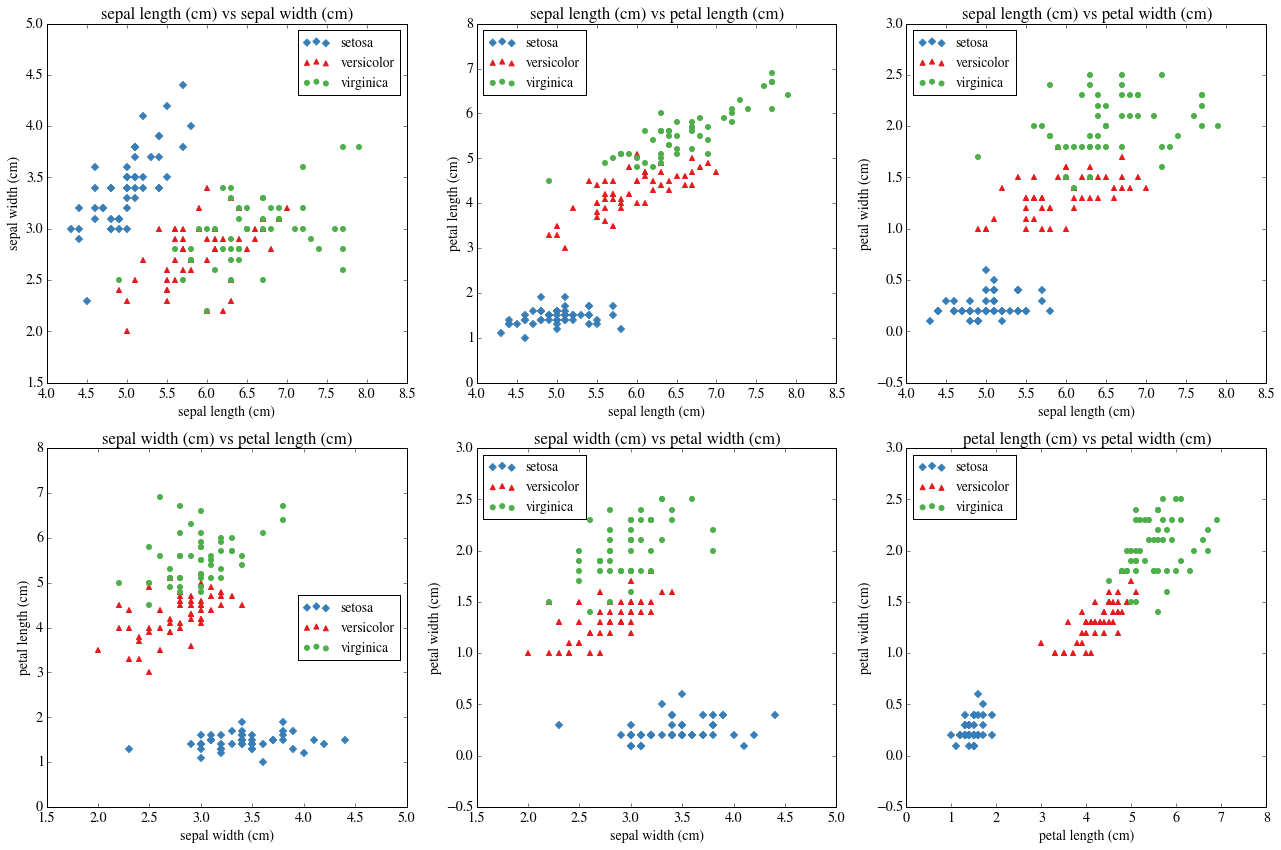

In [2]:
#Plot data between two different attributes
df = pd.DataFrame(data.data,columns=data.feature_names)
df['name'] = pd.Series(data.target,index=df.index)
name_groupby = df.groupby('name')
leg = (l for l in [1,2,2,7,2,2])
pic = ((u,v) for u in range(2) for v in range(3))

fig, ax = plt.subplots(figsize=(18,12),nrows = 2, ncols = 3)
for i in range(4):
    for j in range(i+1,4):
        ix,iy = next(pic)
        ax[ix][iy].set_title(data.feature_names[i]+' vs '+data.feature_names[j])
        colors = (c for c in ['#377eb8','#e41a1c','#4daf4a'])
        markers = (m for m in ['D','^','o'])
        for k,v in name_groupby:
            ax[ix][iy].scatter(v[data.feature_names[i]],v[data.feature_names[j]],color=next(colors),
                               label=data.target_names[k],s=25,marker=next(markers))
            ax[ix][iy].set_xlabel(data.feature_names[i])
            ax[ix][iy].set_ylabel(data.feature_names[j])
        ax[ix][iy].legend(loc=next(leg),prop={'size':13.5})
        
fig.tight_layout()

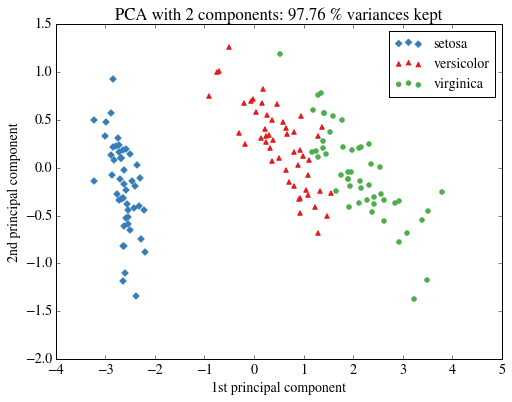

In [3]:
#PCA with 2 components
pca = PCA(n_components=2)
X = pca.fit_transform(data.data)

df = pd.DataFrame({'x1': X[:,0], 'x2': X[:,1], 'name':data.target})
class_groupby = df.groupby('name')

colors = (c for c in ['#377eb8','#e41a1c','#4daf4a'])
markers = (m for m in ['D','^','o'])

fig = plt.figure(figsize=(8,6))
ax = plt.gca()
ax.set_title('PCA with 2 components: %.2f %% variances kept'% (np.sum(pca.explained_variance_ratio_)*100) )
for k,v in class_groupby:
    ax.scatter(v.x1,v.x2,color=next(colors),label=k,s=20,marker=next(markers))
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')

ax.legend(data.target_names ,prop={'size':14})

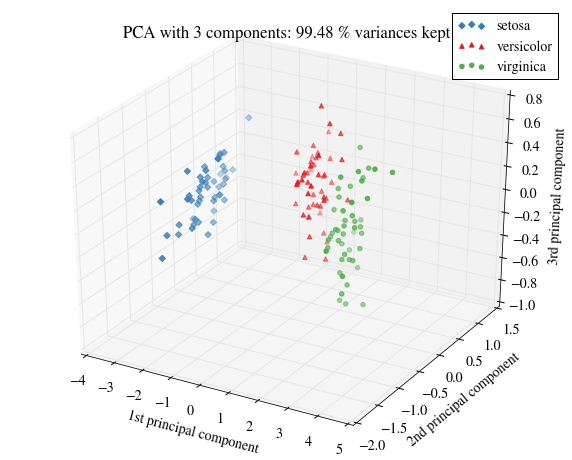

In [4]:
#PCA with 3 components
pca = PCA(n_components=3)
X = pca.fit_transform(data.data)

df = pd.DataFrame({'x1': X[:,0], 'x2': X[:,1],'x3': X[:,2], 'name':data.target})
class_groupby = df.groupby('name')
colors = (c for c in ['#377eb8','#e41a1c','#4daf4a'])
markers = (m for m in ['D','^','o'])

fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection='3d')
ax.set_title('PCA with 3 components: %.2f %% variances kept'% (np.sum(pca.explained_variance_ratio_)*100))
for k,v in class_groupby:
    ax.scatter(v.x1, v.x2, v.x3, color=next(colors), label=k, s=20, marker=next(markers))
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.set_zlabel('3rd principal component')

ax.legend(data.target_names ,prop={'size':14})

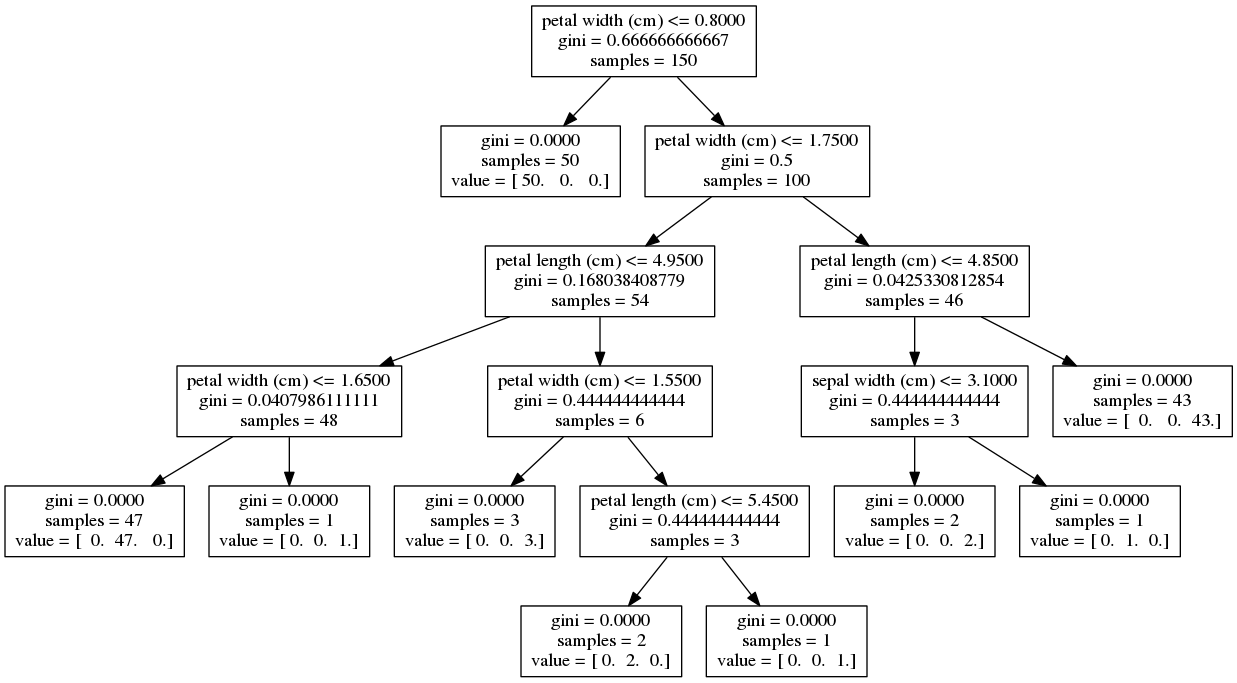

In [5]:
#Decision Tree on iris data
import sklearn.tree as tree
clf = tree.DecisionTreeClassifier()
clf = clf.fit(data.data,data.target)

#Visualize Decision Tree
from IPython.display import Image
from sklearn.externals.six import StringIO
import pydot

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=data.feature_names)   

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

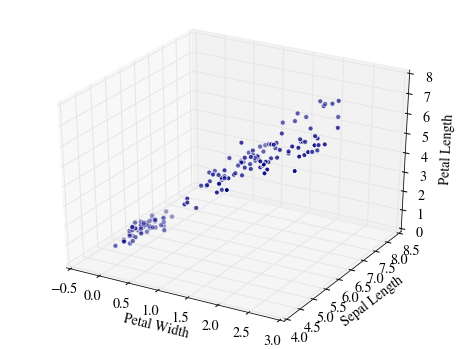

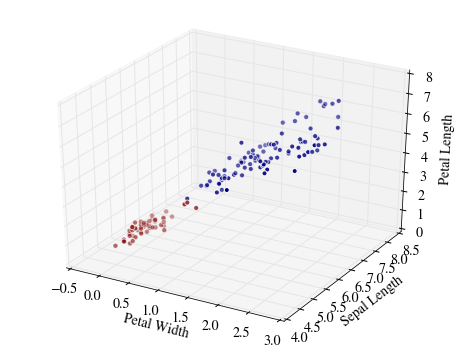

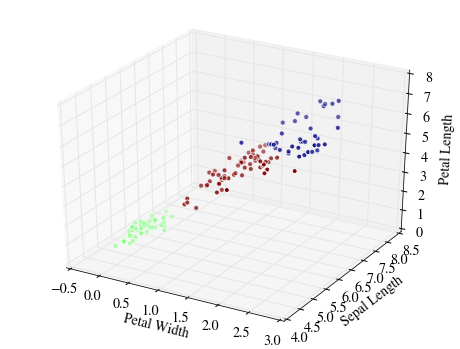

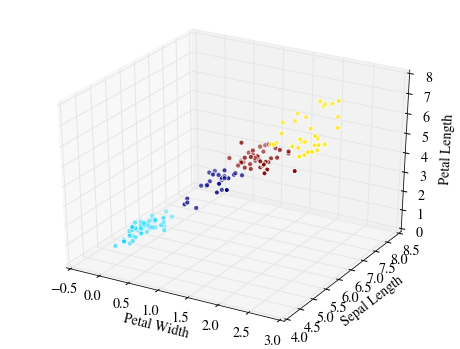

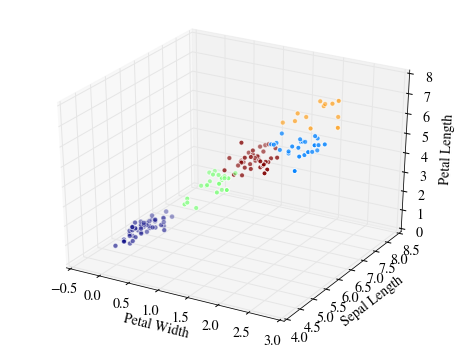

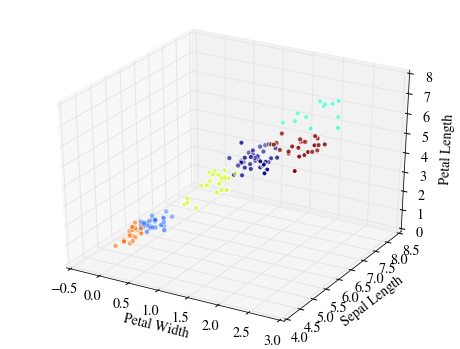

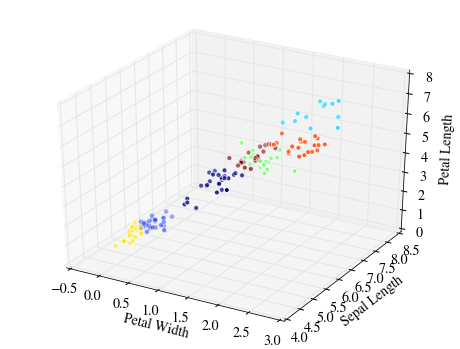

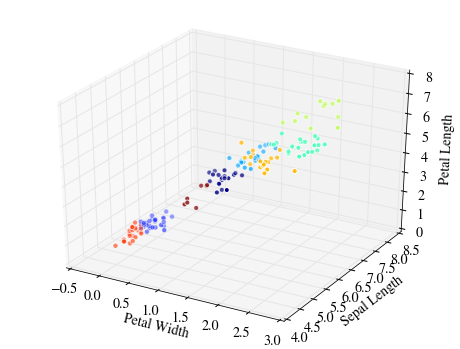

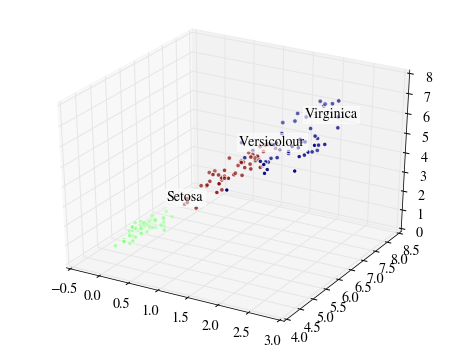

In [6]:
#K-Means clustering
from sklearn.cluster import KMeans

X = data.data
y = data.target

est = {}
for i in range(8): 
    est[i+1] = KMeans(n_clusters=(i+1)) #K = 1 to 8
    
for name, kmeans in est.items():
    fig = plt.figure(figsize=(8,6))
    ax = plt.gca(projection='3d')
    kmeans.fit(X)
    labels = kmeans.labels_
    ax.scatter(X[:,3],X[:,0],X[:,2],c=labels.astype(np.float),s=25)
    
    ax.set_xlabel('Petal Width')
    ax.set_ylabel('Sepal Length')
    ax.set_zlabel('Petal Length')

#Original (cluster by names)
fig = plt.figure(figsize=(8,6))
ax = plt.gca(projection='3d')
for name, label in [('Setosa', 0),
                    ('Versicolour', 1),
                    ('Virginica', 2)]:
    ax.text3D(X[y == label, 3].mean(),
              X[y == label, 0].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))

# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=y)